In [1]:
pip install tensorflow_datasets

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
imdb, info = tfds.load("imdb_reviews", with_info = True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.S1NA43_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.S1NA43_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.S1NA43_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir=PosixGPath('/tmp/tmpuj8e10kbtfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInfo

In [5]:
imdb

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('unsupervised'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [6]:
train_data, test_data = imdb["train"], imdb["test"]

In [7]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

for s, l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s, l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [8]:
print(training_sentences[100])

b"I enjoyed this movie,and after watching it,it made me wonder just how many 'Caitlin Rose's' exist in the world.How many other girls have been subjected to this sort of sexual abuse,and torment by classmates and have been too frightened to open their mouth about it? Just how threatening and cruel can teenagers be towards one another,because as this film demonstrates,who's right is not foremost important,its who is popular,and feared which manipulates the minds of youths,and influences them to allow this sort of immorality to happen.Tiffani Amber Thiessen gives a powerful performance as the rape victim,and Brian Austin Green is convincing as the guy torn between the girl he thought he loved,and his best friend.This is the kind of film that doesn't get the exposure it deserves.Remarkable,and brilliant,too good to be just a film made for TV."


In [9]:
len(training_labels)

25000

In [24]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

##### Preprocessing

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [26]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(training_sentences)


In [27]:
word_index = tokenizer.word_index

In [28]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 "'s": 20,
 'on': 21,
 'you': 22,
 'not': 23,
 'are': 24,
 'his': 25,
 'he': 26,
 'have': 27,
 'be': 28,
 'one': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'they': 33,
 'an': 34,
 'who': 35,
 'so': 36,
 'from': 37,
 'like': 38,
 'her': 39,
 "'t": 40,
 'or': 41,
 'just': 42,
 'there': 43,
 'about': 44,
 'out': 45,
 "'": 46,
 'has': 47,
 'if': 48,
 'some': 49,
 'what': 50,
 'good': 51,
 'more': 52,
 'very': 53,
 'when': 54,
 'she': 55,
 'up': 56,
 'can': 57,
 'b': 58,
 'time': 59,
 'no': 60,
 'even': 61,
 'my': 62,
 'would': 63,
 'which': 64,
 'story': 65,
 'only': 66,
 'really': 67,
 'see': 68,
 'their': 69,
 'had': 70,
 'were': 71,
 'me': 72,
 'well': 73,
 'we': 74,
 'than': 75,
 'much': 76,
 'been': 77,
 'get': 78,
 'bad': 79,
 'will': 80,
 'people': 81,
 'do': 82,
 'also': 83,


In [29]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = 500, truncating = "post", padding = 'pre')
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = 500, truncating = "post", padding = "pre")

In [30]:
padded.shape

(25000, 500)

##### Import libraries

In [31]:
from keras.layers import Dense, Embedding, SimpleRNN, Bidirectional, LSTM, GRU
from keras.models import Sequential

##### Build simple RNN Model

In [32]:
model_rnn = Sequential([
    Embedding(10000, 50, input_length = 500),
    SimpleRNN(32),
    Dense(10, activation = "relu"),
    Dense(1, activation = "sigmoid"),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [33]:
model_rnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model_rnn.compile(loss = "binary_crossentropy",
                  optimizer = "adam",
                  metrics = ["accuracy"])

In [35]:
history = model_rnn.fit(padded,
                        training_labels,
                        epochs = 10,
                        validation_data = (testing_padded, testing_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 64ms/step - accuracy: 0.6536 - loss: 0.6021 - val_accuracy: 0.6410 - val_loss: 0.6187
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 78ms/step - accuracy: 0.7067 - loss: 0.5580 - val_accuracy: 0.7738 - val_loss: 0.4648
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 66ms/step - accuracy: 0.8241 - loss: 0.3990 - val_accuracy: 0.7326 - val_loss: 0.5219
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 62ms/step - accuracy: 0.8269 - loss: 0.3938 - val_accuracy: 0.7918 - val_loss: 0.4691
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.7689 - loss: 0.5076 - val_accuracy: 0.7994 - val_loss: 0.4645
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.8855 - loss: 0.2863 - val_accuracy: 0.8138 - val_loss: 0.4445
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.9088 - loss: 0.2353 - val_accuracy: 0.8007 - val_loss: 0.5227
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.9459 - loss: 0.1529 - 

In [36]:
import matplotlib.pyplot as plt


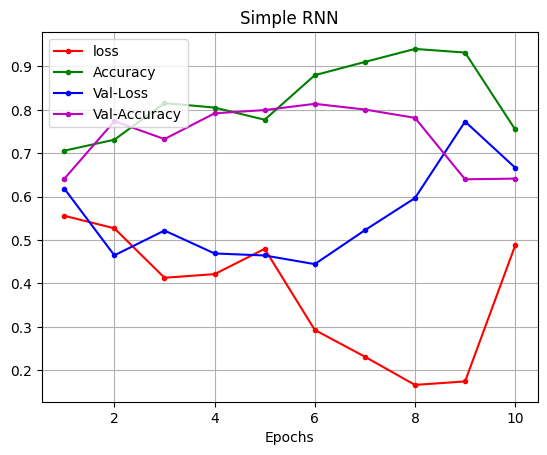

In [41]:
plt.title("Simple RNN")
plt.xlabel("Epochs")
plt.grid()
plt.plot(range(1,11), history.history["loss"],
         color = "r", label = "loss", marker = ".")
plt.plot(range(1,11), history.history["accuracy"],
         color = "g", label = "Accuracy", marker = ".")
plt.plot(range(1,11), history.history["val_loss"],
         color = "b", label = "Val-Loss", marker = ".")
plt.plot(range(1,11), history.history["val_accuracy"],
         color = "m", label = "Val-Accuracy", marker = ".")
plt.legend(loc = "upper left")

##### Build LSTM Model


In [38]:
model_lstm = Sequential([
        Embedding(10000, 50, input_length = 50),
        Bidirectional(LSTM(32)),
        Dense(10, activation = "relu"),
        Dense(1, activation = "sigmoid")
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [39]:
model_lstm.compile(loss = "binary_crossentropy",
                   optimizer = "adam",
                   metrics = ["accuracy"])

In [40]:
history_lstm = model_lstm.fit(padded, training_labels,
                              epochs = 10,
                              validation_data = (testing_padded, testing_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.7053 - loss: 0.5412 - val_accuracy: 0.8227 - val_loss: 0.4048
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.8866 - loss: 0.2877 - val_accuracy: 0.8690 - val_loss: 0.3132
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9044 - loss: 0.2418 - val_accuracy: 0.8702 - val_loss: 0.3265
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9468 - loss: 0.1515 - val_accuracy: 0.8656 - val_loss: 0.3633
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9536 - loss: 0.1284 - val_accuracy: 0.8654 - val_loss: 0.3820
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9719 - loss: 0.0848 - val_accuracy: 0.8383 - val_loss: 0.5253
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9759 - loss: 0.0756 - val_accuracy: 0.8600 - val_loss: 0.5045
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9707 - loss: 0.0835 - 

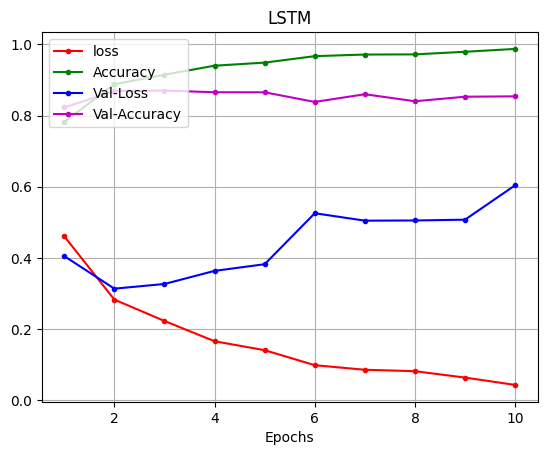

In [43]:
plt.title("LSTM")
plt.xlabel("Epochs")
plt.grid()
plt.plot(range(1,11), history_lstm.history["loss"],
         color = "r", label = "loss", marker = ".")
plt.plot(range(1,11), history_lstm.history["accuracy"],
         color = "g", label = "Accuracy", marker = ".")
plt.plot(range(1,11), history_lstm.history["val_loss"],
         color = "b", label = "Val-Loss", marker = ".")
plt.plot(range(1,11), history_lstm.history["val_accuracy"],
         color = "m", label = "Val-Accuracy", marker = ".")
plt.legend(loc = "upper left")

##### Building GRU model

In [44]:
model_gru = Sequential([
        Embedding(10000, 50, input_length = 50),
        Bidirectional(GRU(32)),
        Dense(10, activation = "relu"),
        Dense(1, activation = "sigmoid")
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [45]:
model_gru.compile(loss = "binary_crossentropy",
                   optimizer = "adam",
                   metrics = ["accuracy"])

In [46]:
history_gru = model_gru.fit(padded, training_labels,
                              epochs = 10,
                              validation_data = (testing_padded, testing_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step - accuracy: 0.6795 - loss: 0.5614 - val_accuracy: 0.8353 - val_loss: 0.3750
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.8770 - loss: 0.3107 - val_accuracy: 0.8636 - val_loss: 0.3272
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.9198 - loss: 0.2193 - val_accuracy: 0.8758 - val_loss: 0.3045
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.9472 - loss: 0.1526 - val_accuracy: 0.8694 - val_loss: 0.3256
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9639 - loss: 0.1126 - val_accuracy: 0.8677 - val_loss: 0.3746
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.9740 - loss: 0.0804 - val_accuracy: 0.8628 - val_loss: 0.4421
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9845 - loss: 0.0495 - val_accuracy: 0.8674 - val_loss: 0.5076
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.9907 - loss: 0.0311 - 

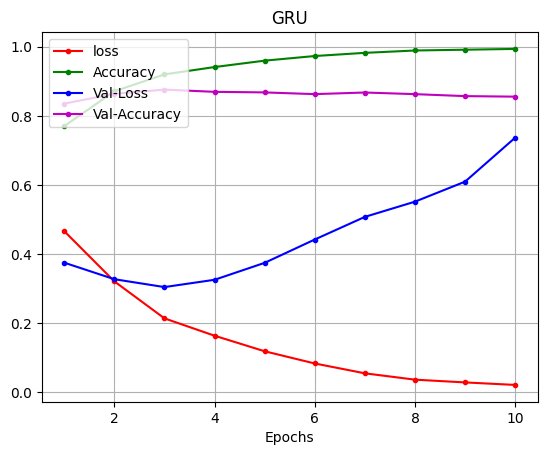

In [47]:
plt.title("GRU")
plt.xlabel("Epochs")
plt.grid()
plt.plot(range(1,11), history_gru.history["loss"],
         color = "r", label = "loss", marker = ".")
plt.plot(range(1,11), history_gru.history["accuracy"],
         color = "g", label = "Accuracy", marker = ".")
plt.plot(range(1,11), history_gru.history["val_loss"],
         color = "b", label = "Val-Loss", marker = ".")
plt.plot(range(1,11), history_gru.history["val_accuracy"],
         color = "m", label = "Val-Accuracy", marker = ".")
plt.legend(loc = "upper left")

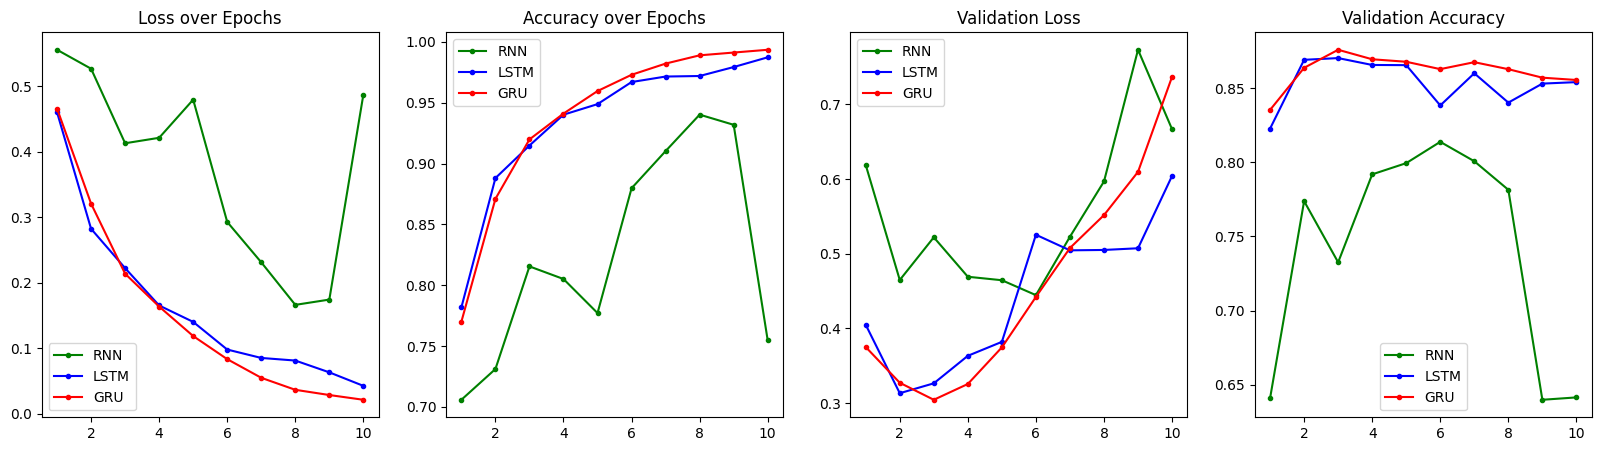

In [52]:
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
ax[0].plot(range(1,11), history.history["loss"],
         color = "g", label = "RNN", marker = ".")
ax[0].plot(range(1,11), history_lstm.history["loss"],
         color = "b", label = "LSTM", marker = ".")
ax[0].plot(range(1,11), history_gru.history["loss"],
         color = "r", label = "GRU", marker = ".")
ax[0].set_title("Loss over Epochs")
ax[0].legend()

ax[1].plot(range(1,11), history.history["accuracy"],
         color = "g", label = "RNN", marker = ".")
ax[1].plot(range(1,11), history_lstm.history["accuracy"],
         color = "b", label = "LSTM", marker = ".")
ax[1].plot(range(1,11), history_gru.history["accuracy"],
         color = "r", label = "GRU", marker = ".")
ax[1].set_title("Accuracy over Epochs")
ax[1].legend()

ax[2].plot(range(1,11), history.history["val_loss"],
         color = "g", label = "RNN", marker = ".")
ax[2].plot(range(1,11), history_lstm.history["val_loss"],
         color = "b", label = "LSTM", marker = ".")
ax[2].plot(range(1,11), history_gru.history["val_loss"],
         color = "r", label = "GRU", marker = ".")
ax[2].set_title("Validation Loss")
ax[2].legend()

ax[3].plot(range(1,11), history.history["val_accuracy"],
         color = "g", label = "RNN", marker = ".")
ax[3].plot(range(1,11), history_lstm.history["val_accuracy"],
         color = "b", label = "LSTM", marker = ".")
ax[3].plot(range(1,11), history_gru.history["val_accuracy"],
         color = "r", label = "GRU", marker = ".")
ax[3].set_title("Validation Accuracy")
ax[3].legend()

In [58]:
new1 = "This was worst movie, Please do not watch it. Waster of money and time."
new2 = "A must watch movie. I loved to watch it. It was just amazing!."

In [59]:
def predict(model, text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen = 500, truncating = "post", padding = 'pre')
    result = model.predict(pad, verbose = False)
    percent_pos = result[0, 0]
    if round(percent_pos) == 0:
        return (1 - percent_pos, "Negative")
    else:
        return (percent_pos, "Positive")


In [60]:
predict(model_rnn, new1), predict(model_rnn, new2)

((0.5506192743778229, 'Negative'), (0.9723539, 'Positive'))

In [61]:
predict(model_lstm, new1), predict(model_lstm, new2)

((0.9981852963101119, 'Negative'), (0.989612, 'Positive'))

In [62]:
predict(model_gru, new1), predict(model_gru, new2)

((0.999980454253091, 'Negative'), (0.99960196, 'Positive'))